# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
import warnings 
warnings.filterwarnings('ignore')


## Load and review data

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/NIIT-Batch/main/auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
329,44.6,4,91.0,67,1850,13.8,80,3,honda civic 1500 gl
88,14.0,8,302.0,137,4042,14.5,73,1,ford gran torino
289,16.9,8,350.0,155,4360,14.9,79,1,buick estate wagon (sw)
249,19.9,8,260.0,110,3365,15.5,78,1,oldsmobile cutlass salon brougham
310,38.1,4,89.0,60,1968,18.8,80,3,toyota corolla tercel
242,21.5,4,121.0,110,2600,12.8,77,2,bmw 320i
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
319,31.3,4,120.0,75,2542,17.5,80,3,mazda 626
211,16.5,6,168.0,120,3820,16.7,76,2,mercedes-benz 280s
213,13.0,8,350.0,145,4055,12.0,76,1,chevy c10


In [5]:
df.shape

(398, 9)

In [6]:
df.drop("car name",axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [8]:
#Also replacing the categotical var with actual values 
df['origin']=df['origin'].replace({1:'America',2:"Europe",3:"Asia"})
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
139,14.0,8,302.0,140,4638,16.0,74,America
221,17.5,8,305.0,145,3880,12.5,77,America
295,35.7,4,98.0,80,1915,14.4,79,America
382,34.0,4,108.0,70,2245,16.9,82,Asia
282,22.3,4,140.0,88,2890,17.3,79,America
359,28.1,4,141.0,80,3230,20.4,81,Europe
220,33.5,4,85.0,70,1945,16.8,77,Asia
334,23.7,3,70.0,100,2420,12.5,80,Asia
372,27.0,4,151.0,90,2735,18.0,82,America
190,14.5,8,351.0,152,4215,12.8,76,America


In [9]:
# one hot encoding
df=pd.get_dummies(df,columns=['origin'])### one hot encoding 
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
201,18.5,6,250.0,110,3645,16.2,76,1,0,0
55,27.0,4,97.0,60,1834,19.0,71,0,0,1
109,21.0,4,140.0,72,2401,19.5,73,1,0,0
134,16.0,6,258.0,110,3632,18.0,74,1,0,0
257,19.4,6,232.0,90,3210,17.2,78,1,0,0
355,33.7,4,107.0,75,2210,14.4,81,0,1,0
101,23.0,6,198.0,95,2904,16.0,73,1,0,0
303,31.8,4,85.0,65,2020,19.2,79,0,1,0
77,22.0,4,121.0,76,2511,18.0,72,0,0,1
187,17.5,8,305.0,140,4215,13.0,76,1,0,0


In [10]:
df.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64

In [11]:
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

In [12]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [13]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000


##  Dealing with Missing Values

In [14]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [15]:
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000


In [16]:
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

In [17]:
df['horsepower']=df['horsepower'].replace(to_replace='?',value=np.nan)
df['horsepower']=df['horsepower'].astype(float)

In [18]:
df.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        6
weight            0
acceleration      0
model year        0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64

In [19]:
median1=df['horsepower'].median()
median1

93.5

In [21]:
df['horsepower'].replace(np.nan,median1,inplace=True)

In [22]:
df.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64

# Bivariant Plots

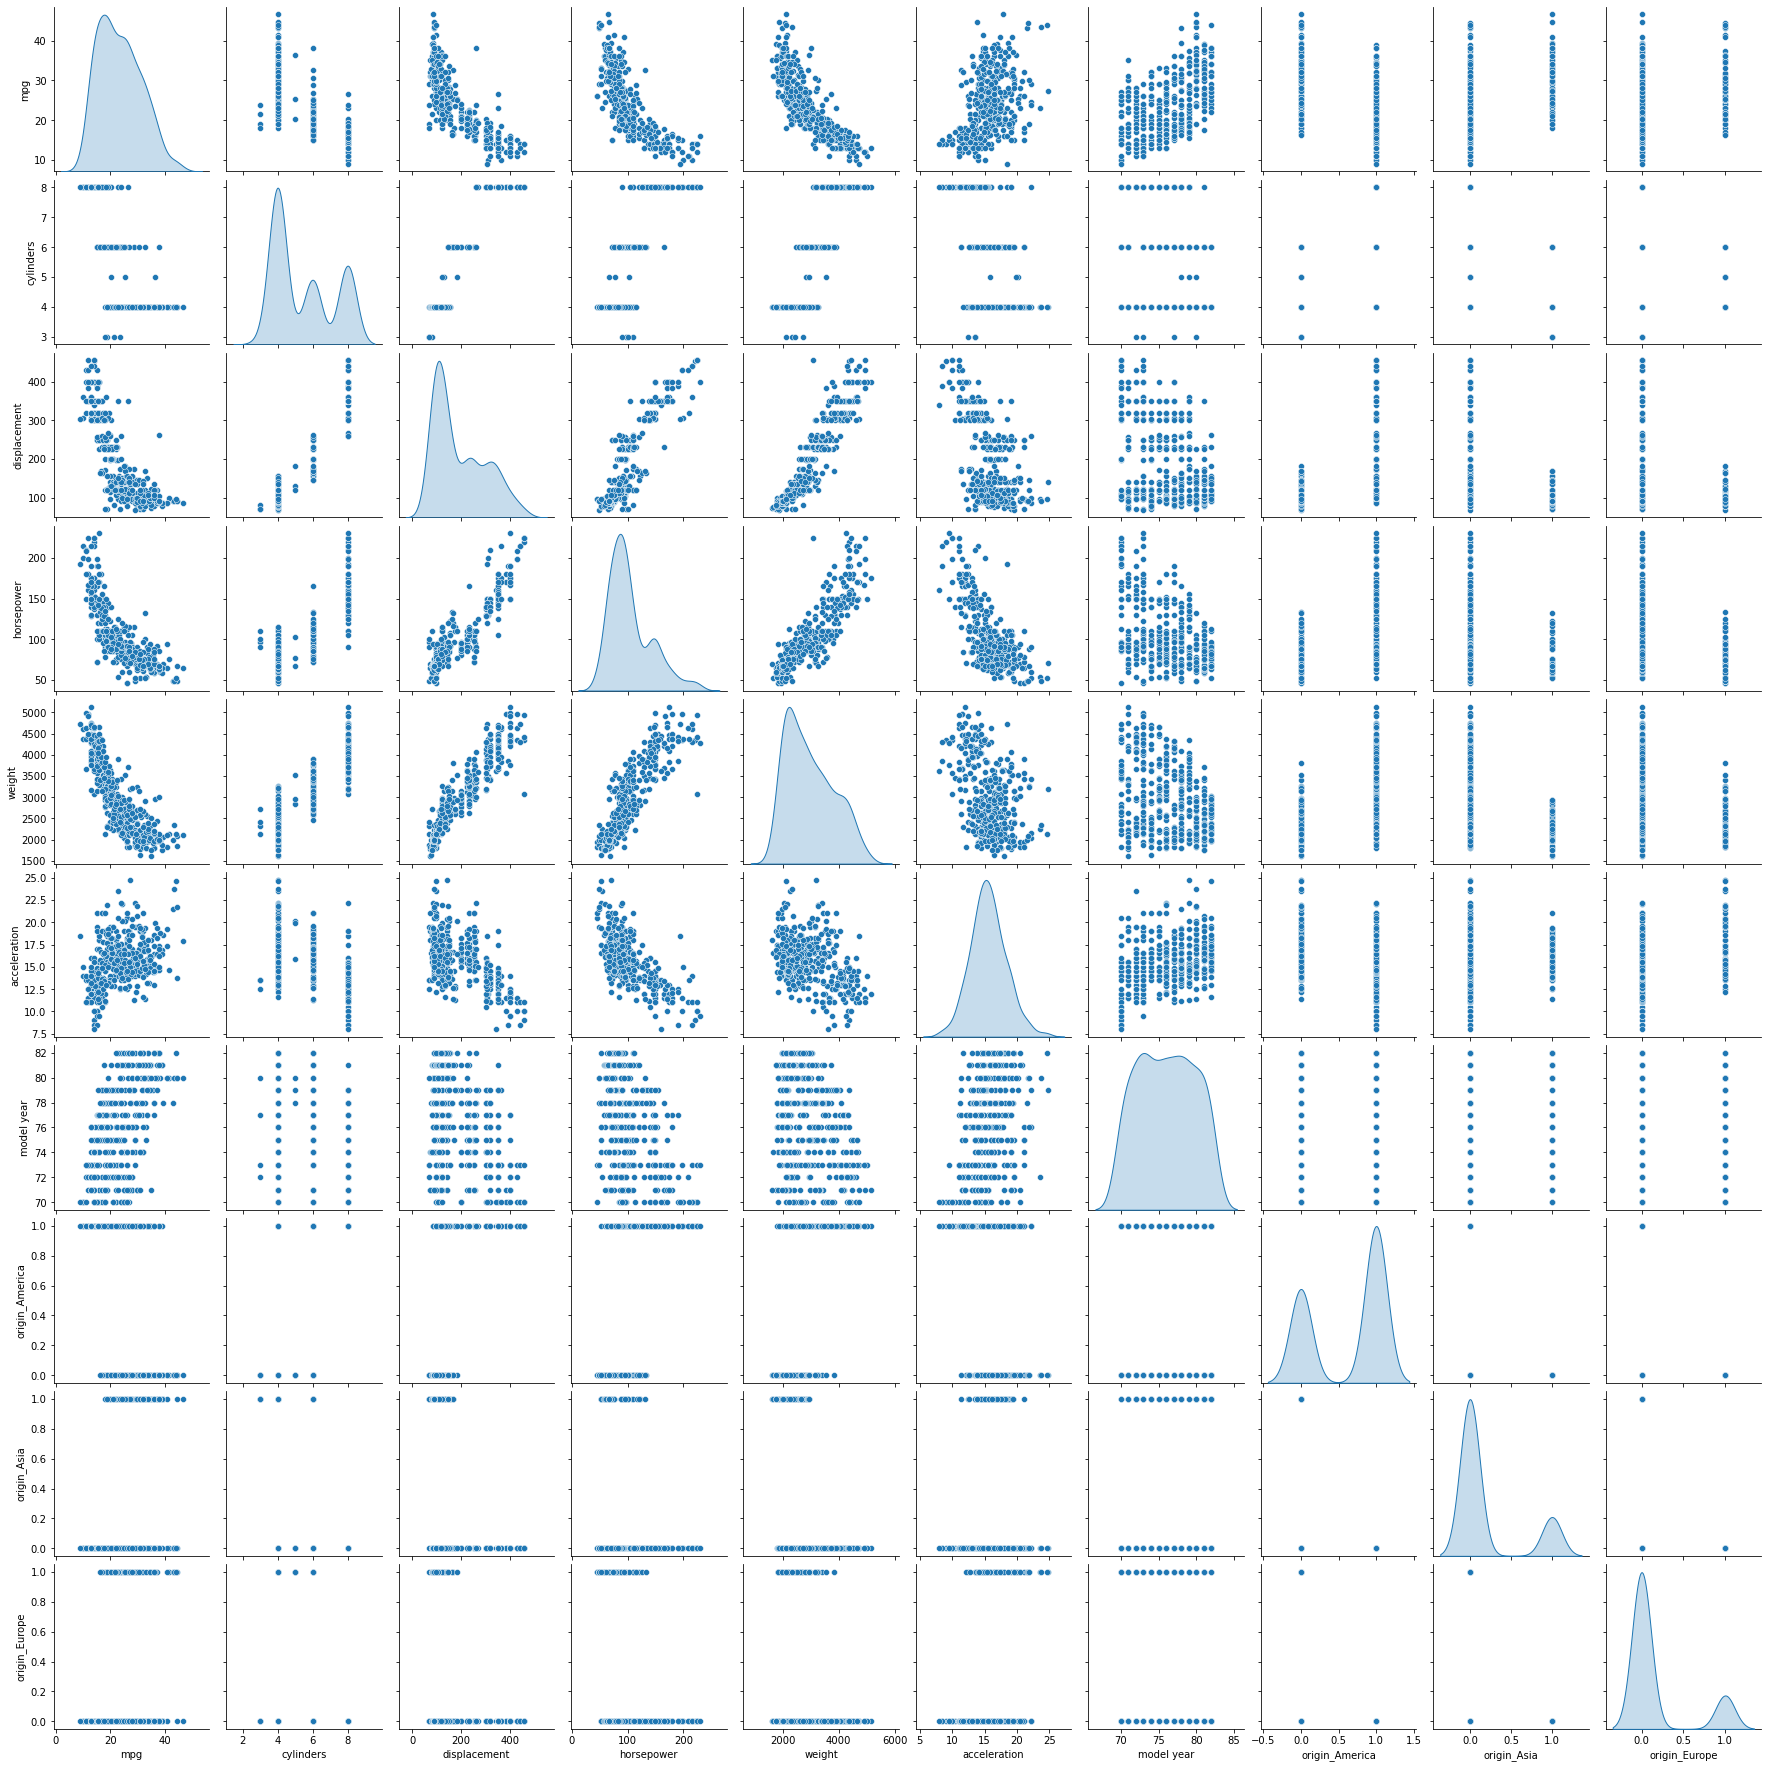

In [20]:
sns.pairplot(df,diag_kind="kde")

<AxesSubplot:xlabel='origin_Asia', ylabel='count'>

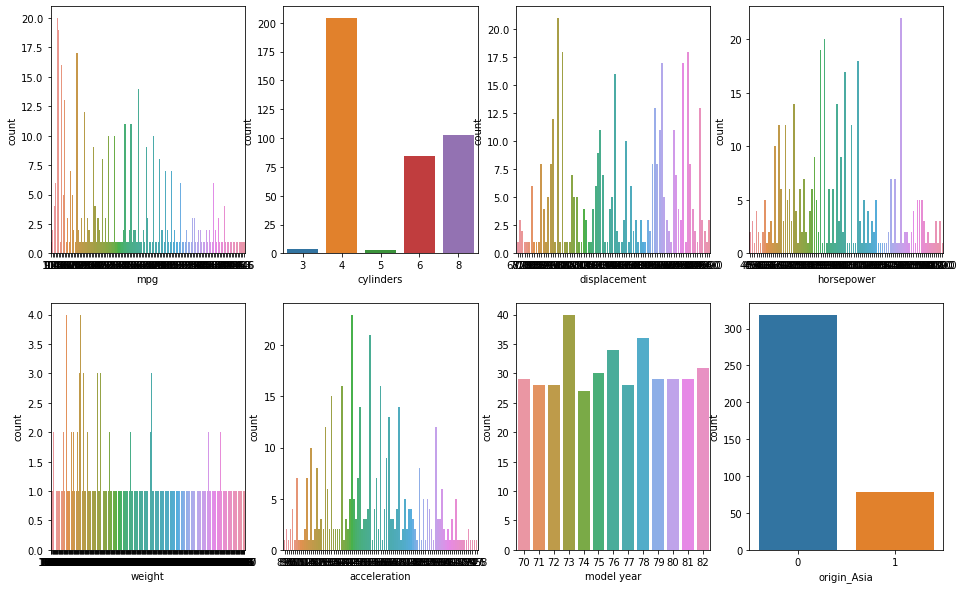

In [24]:
fig,ax=plt.subplots(2,4,figsize=(16,10))
sns.countplot("mpg",data=df,ax=ax[0][0])
sns.countplot("cylinders",data=df,ax=ax[0][1])
sns.countplot("displacement",data=df,ax=ax[0][2])
sns.countplot("horsepower",data=df,ax=ax[0][3])
sns.countplot("weight",data=df,ax=ax[1][0])
sns.countplot("acceleration",data=df,ax=ax[1][1])
sns.countplot("model year",data=df,ax=ax[1][2])
sns.countplot("origin_Asia",data=df,ax=ax[1][3])

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>],
       [<AxesSubplot:title={'center':'model year'}>,
        <AxesSubplot:title={'center':'origin_America'}>,
        <AxesSubplot:title={'center':'origin_Asia'}>],
       [<AxesSubplot:title={'center':'origin_Europe'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

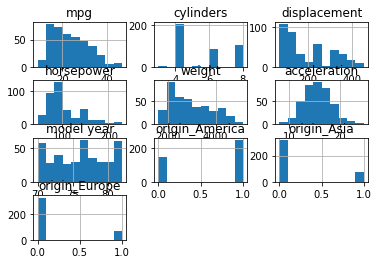

In [25]:
df.hist()

## Split Data

In [26]:
#lets build our linear model
# independant variables
X=df.drop(['mpg'],axis=1)
# the dependent variable
y=df[['mpg']]

In [27]:
#split X and y into training and test set is 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

## Fit  Linear Model

In [29]:
model_1=LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [30]:
model_1.score(X_train,y_train)

0.8141025501610559

In [31]:
# out of sample score(R^2)
model_1.score(X_test,y_test)

0.843313513280883

In [32]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model


poly = PolynomialFeatures(degree=2,interaction_only=True) #allowing algorithm  combination variables
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)


poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train2,y_train)
#y_pred=poly_clf.predict(X_test2)
#print(y_pred)
# In sample (training) R^2 will always improve with the number of variables
print(poly_clf.score(X_train2,y_train))

0.9015333048254973


In [33]:
print(poly_clf.score(X_test2,y_test))

0.8647737721702321


In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
model1=DecisionTreeRegressor()
model1.fit(X_train,y_train)
print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))

1.0
0.7254545410490514


In [36]:
model1_reg=DecisionTreeRegressor(max_depth=3,criterion='mse')
model1_reg.fit(X_train,y_train)
print(model1_reg.score(X_train,y_train))
print(model1_reg.score(X_test,y_test))

0.8252713272277856
0.7892652919447365


In [37]:
from  sklearn.ensemble import AdaBoostRegressor

In [38]:
model5=AdaBoostRegressor()
model5.fit(X_train,y_train)
print(model5.score(X_train,y_train))
print(model5.score(X_test,y_test))

0.9237414523380412
0.8246563162102616


In [39]:
model5_reg=AdaBoostRegressor(n_estimators=20,base_estimator=model1)
model5_reg.fit(X_train,y_train)
print(model5_reg.score(X_train,y_train))
print(model5_reg.score(X_test,y_test))

0.998847919571103
0.8475591548671451


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
model5=GradientBoostingRegressor(n_estimators=20)
model5.fit(X_train,y_train)
print(model5.score(X_train,y_train))
print(model5.score(X_test,y_test))

0.9075069090133627
0.8658641507799457


In [42]:
from sklearn.svm import SVR
model7=SVR(kernel='rbf', gamma='scale') 
model7.fit(X_train,y_train)
print(model7.score(X_train,y_train))
print(model7.score(X_test,y_test))

0.6730441394416611
0.7190465392962471
